In [2]:
%matplotlib inline

import os
import sys
import math
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial

module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)
    
from preprocessing import select
from consts import dataset, model_cols

plt.rcParams.update({'figure.max_open_warning': 0})

# Análises a cerca da base de dados

## Carregando bases
- Base inicial (com todas as instâncias)
- Base amostral (cerca de 8000 instâncias e 60 variáveis)

In [3]:
database_path = '{}/data/processed/database.csv'.format(module_path)
dataset_path = '{}/data/processed/dataset.csv'.format(module_path)
sample_path = '{}/data/processed/sample.csv'.format(module_path)

df_database = pd.read_csv(database_path)
df_dataset = pd.read_csv(dataset_path)
df_sample = pd.read_csv(sample_path)

## Depressão x Região

In [4]:
a = df_database.query('Diagnosticado_Depressao == 1')['Regiao'].value_counts()
b = df_database.query('Diagnosticado_Depressao == 1 | Diagnosticado_Depressao == 2')['Regiao'].value_counts()
c = ((a / b) * 100)
cols = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantis',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

select(c.to_frame().transpose(), cols).transpose()

,Regiao
Rondônia,4.604486
Acre,5.292172
Amazonas,2.629544
Roraima,4.839723
Pará,2.694611
Amapá,3.828829
Tocantis,7.260726
Maranhão,3.551297
Piauí,4.656319
Ceará,5.078125


## Dados Ausentes

(a) Considerando todos os atributos;  
(b) Considerando um limiar de <= 80%;
(c) Atributos com ausência > 80%.

In [5]:
n = df_dataset.shape[0]
missing_vals = ((n - df_dataset.count()) / df_dataset.shape[0]) * 100
cols = { 0: 'Porcentagem' }

select(missing_vals.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Nasceu_Ou_Adquiriu_Defic_Intelectual,99.185360
Defic_Intelectual_Limita_Atividades,99.185360
Doença_Fisica_Cronica_Mental,0.000000
Visita_Medico,96.257379
Doença_Cerebral_Limita,96.257379
Esqz_Bipol_Psicose_TOC,0.000000
Psicoterapia_Doenca_Mental,96.257379


In [6]:
limiar = missing_vals[missing_vals <= 80]
select(limiar.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Doença_Fisica_Cronica_Mental,0.000000
Esqz_Bipol_Psicose_TOC,0.000000
Diagnostico_Doenca_Coracao,0.000000
Diagnostico_Doença_Pulmao,0.000000
Diagnostico_Cancer,0.000000
Diagnostico_Insuf_Renal_Cronica,0.000000
Duas_Semanas_Cansado,1.086187


In [7]:
limiar = missing_vals[missing_vals > 80]
select(limiar.to_frame(), cols)

,Porcentagem
Nasceu_Ou_Adquiriu_Defic_Intelectual,99.185360
Defic_Intelectual_Limita_Atividades,99.185360
Visita_Medico,96.257379
Doença_Cerebral_Limita,96.257379
Psicoterapia_Doenca_Mental,96.257379
Medicamentos_Doenca_Mental,96.257379
Diagnostico_Infarto,93.246753
Diagnostico_Angina,93.246753
Diagnostico_Insuf_Cardiaca,93.246753
Diagnostico_Enf_Pulmonar,97.060213


## Descrição da base amostral

In [15]:
df_dataset[['Idade', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez', 'Parou_Menstruar']].describe()

,Idade,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez,Parou_Menstruar
count,8470.000000,1822.000000,2674.000000,1880.000000
mean,45.268241,10.428101,20.760284,46.100000
std,16.038140,4.836485,5.338989,10.440465
min,18.000000,1.000000,0.000000,0.000000
25%,32.000000,7.000000,17.000000,44.000000
50%,44.000000,14.000000,20.000000,49.000000
75%,57.000000,14.000000,23.000000,52.000000
max,97.000000,14.000000,43.000000,65.000000


In [20]:
df_dataset.query('Diagnosticado_Depressao == 1')['Idade'].value_counts()

50    113
38    111
47    111
42    105
43    104
33    103
35    103
44    102
49    100
54     98
52     98
40     95
39     95
51     95
53     95
56     92
36     92
34     91
48     90
30     90
31     88
46     88
45     86
57     83
41     83
37     82
32     81
60     81
55     80
58     78
     ... 
73     36
69     36
74     36
68     34
71     34
70     31
75     30
21     28
72     28
77     27
22     27
23     27
76     25
19     24
20     24
78     23
80     16
18     15
79     15
82     11
84      8
81      8
85      8
83      7
86      5
88      4
89      4
90      3
87      2
94      1
Name: Idade, Length: 74, dtype: int64

In [21]:
df_dataset.query('Diagnosticado_Depressao == 2')['Idade'].value_counts()

32    128
29    114
30    105
37    104
43    103
35    103
27    103
25    100
28    100
24    100
40     98
36     94
33     92
38     92
26     88
31     88
49     86
19     84
53     83
34     82
39     80
41     80
21     79
18     78
20     78
52     77
42     77
23     76
46     76
22     74
     ... 
54     36
67     34
70     34
72     33
74     31
68     25
75     24
73     23
77     22
76     22
79     19
80     17
82     14
78     13
81     11
83      8
84      7
86      7
89      7
85      6
87      5
90      4
94      4
95      3
88      2
92      2
93      2
96      1
91      1
97      1
Name: Idade, Length: 80, dtype: int64

## Histogramas (frequência de cada atributo x valor)

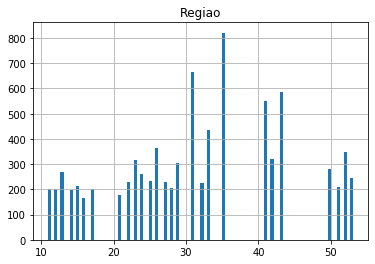

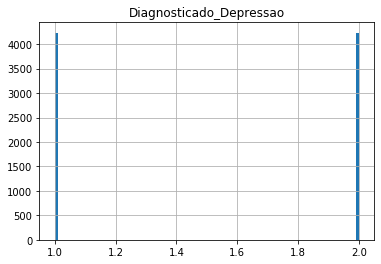

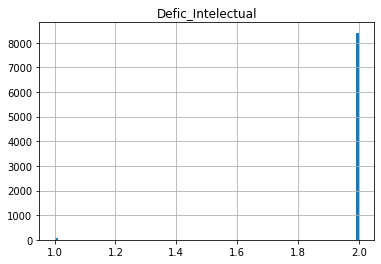

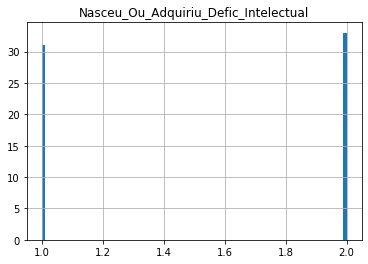

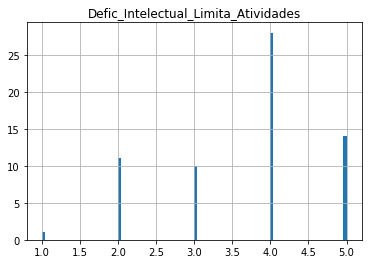

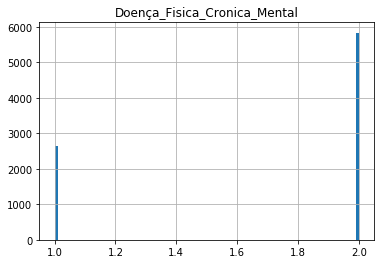

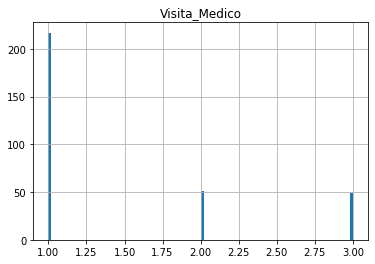

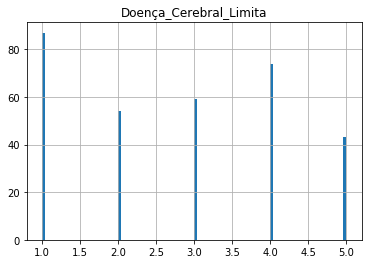

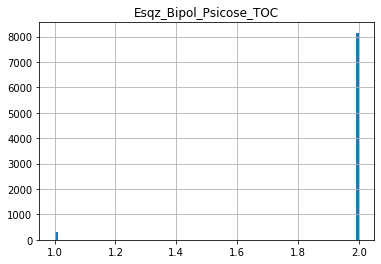

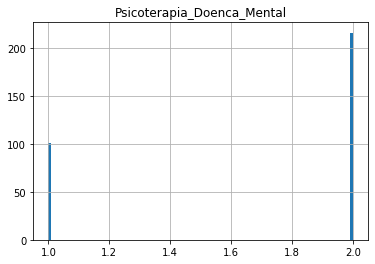

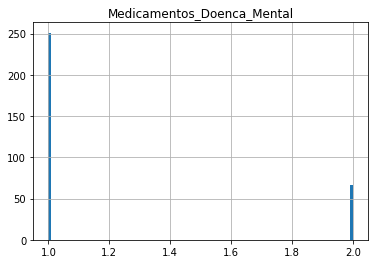

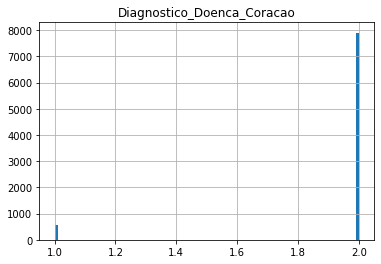

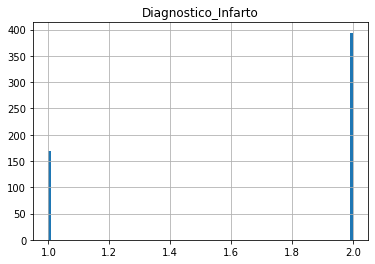

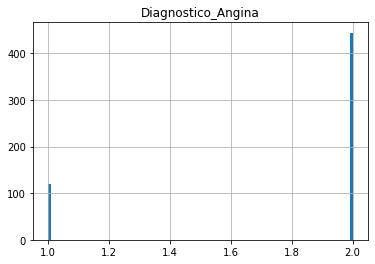

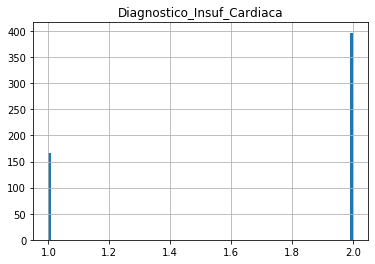

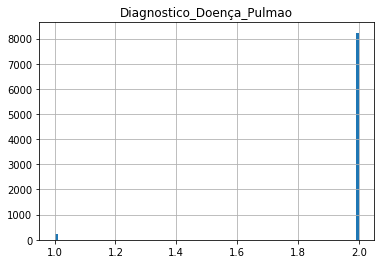

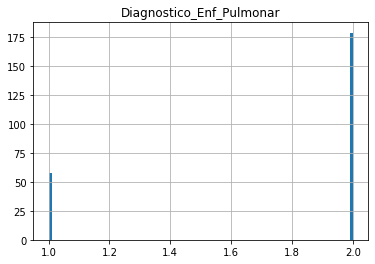

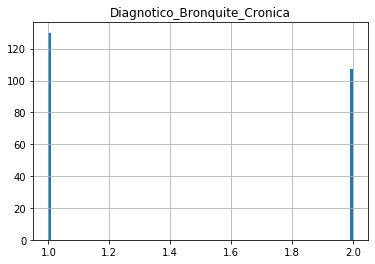

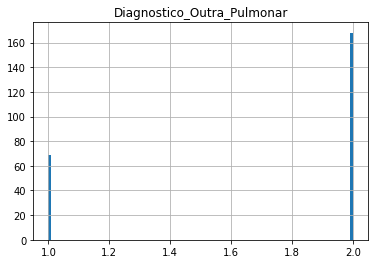

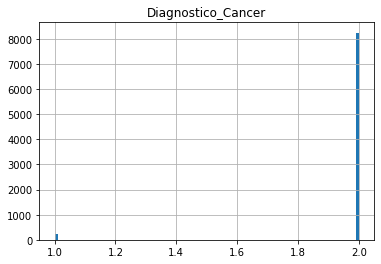

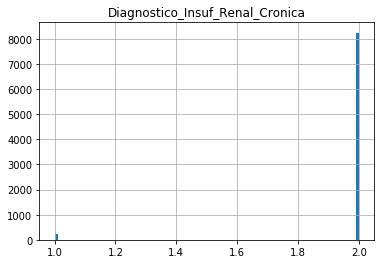

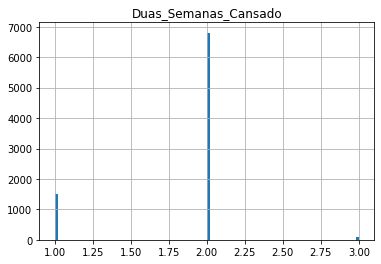

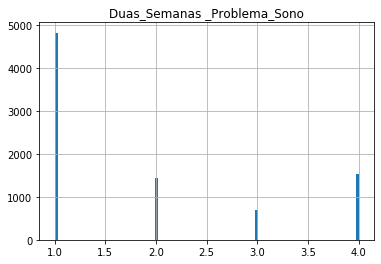

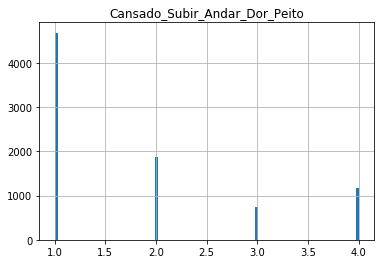

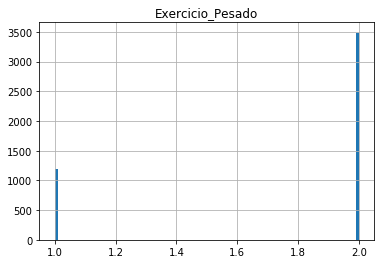

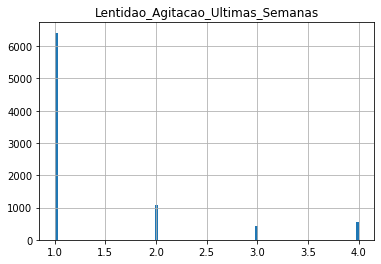

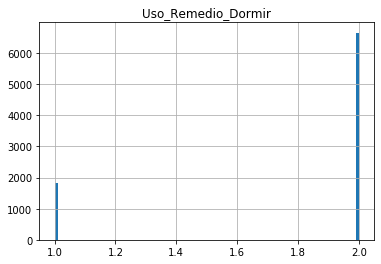

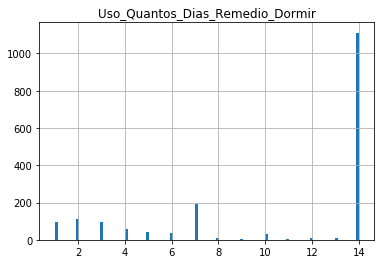

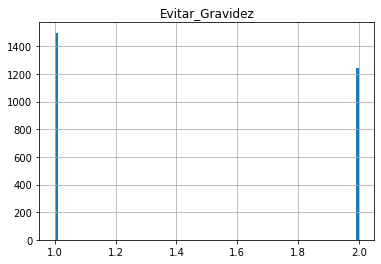

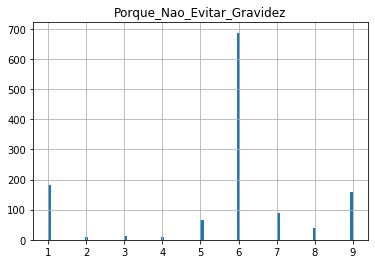

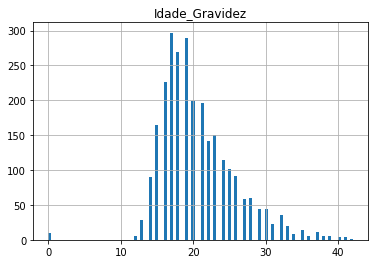

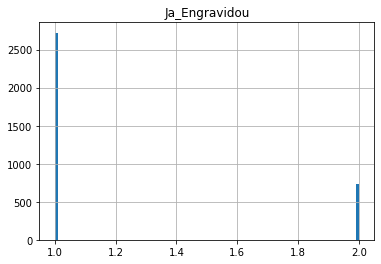

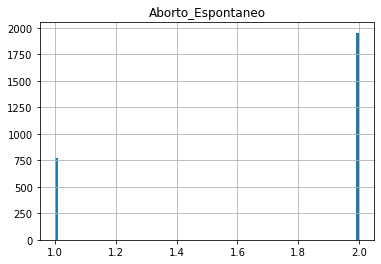

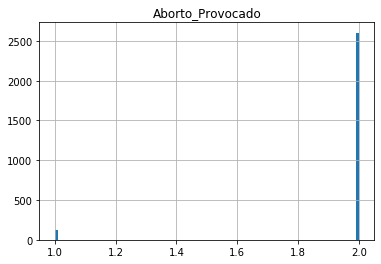

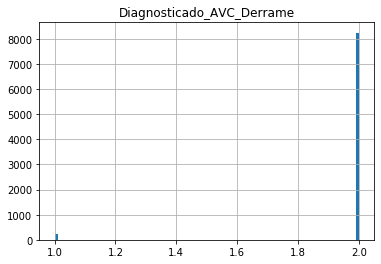

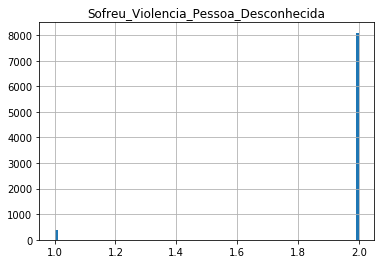

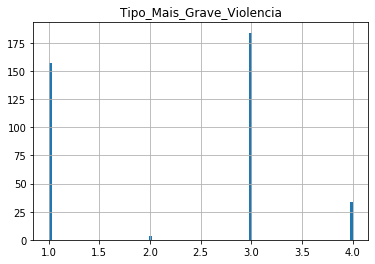

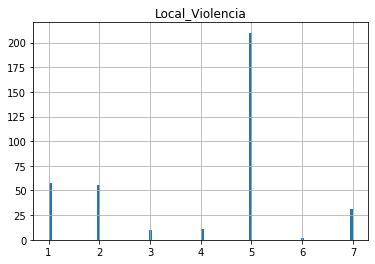

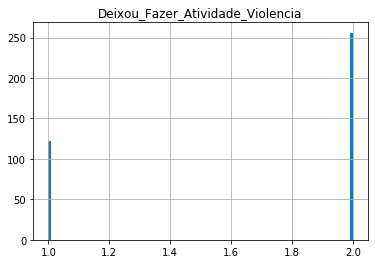

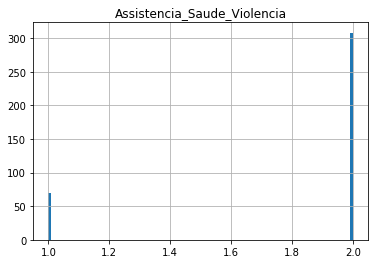

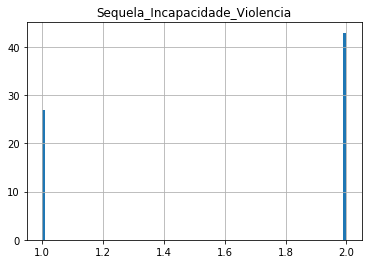

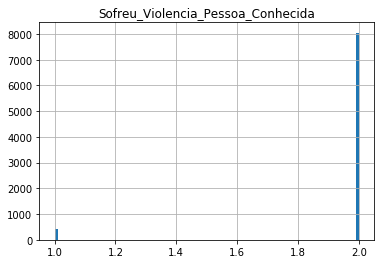

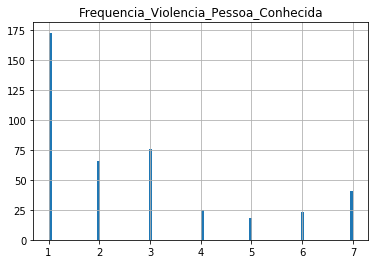

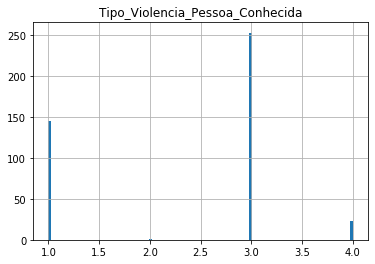

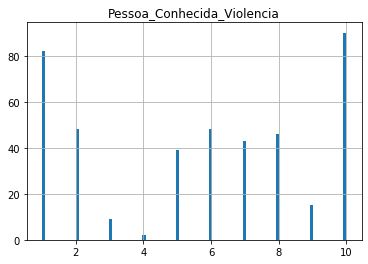

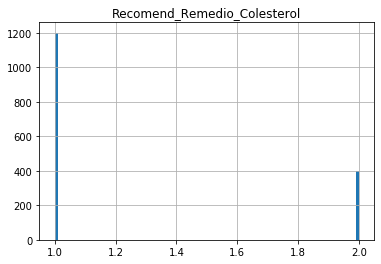

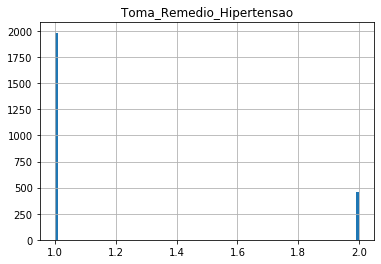

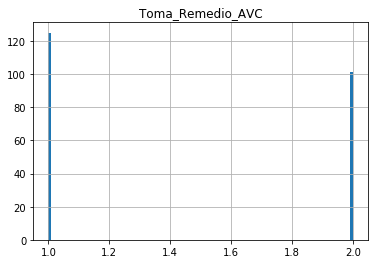

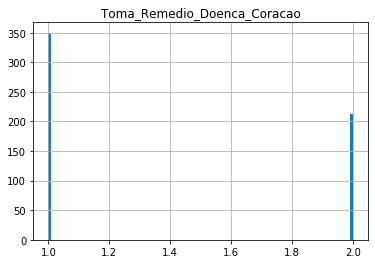

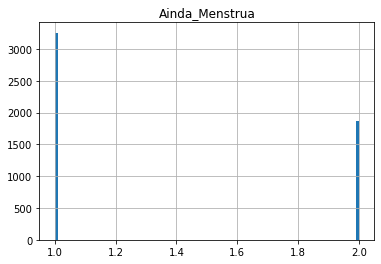

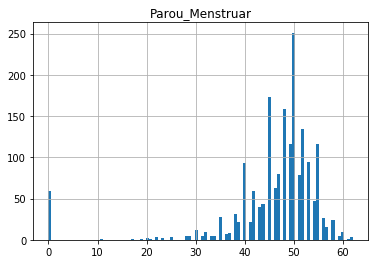

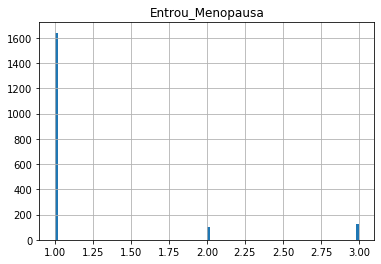

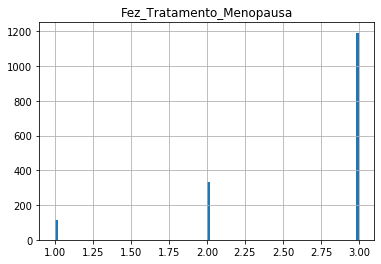

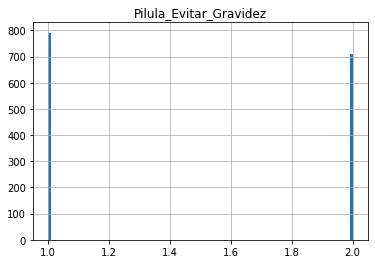

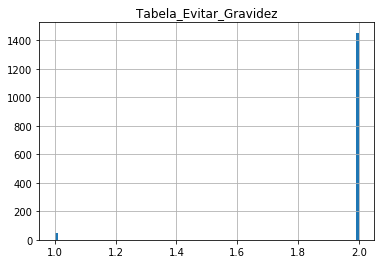

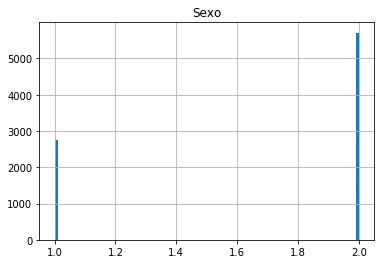

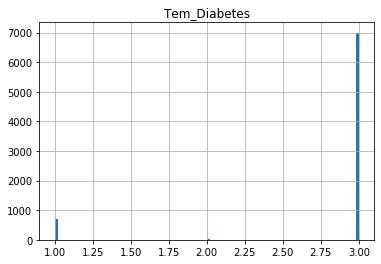

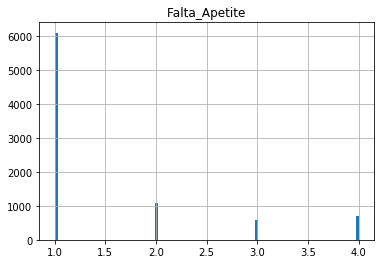

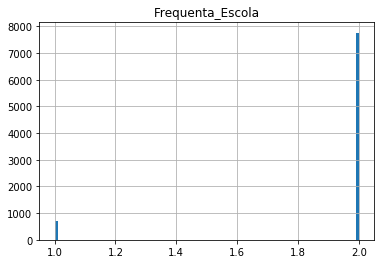

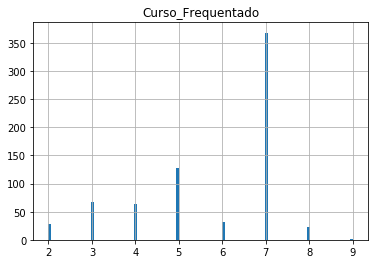

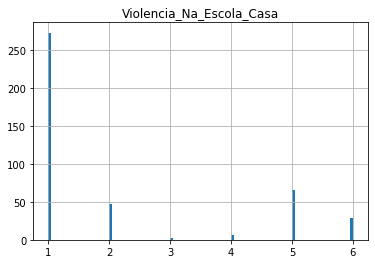

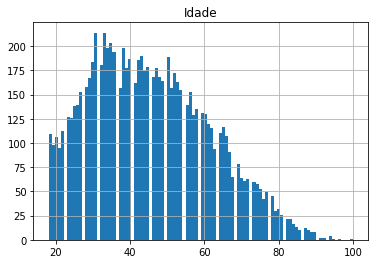

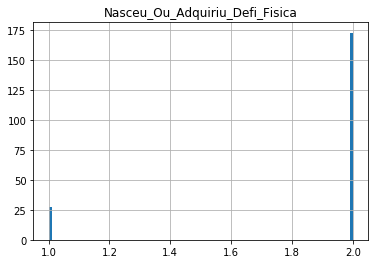

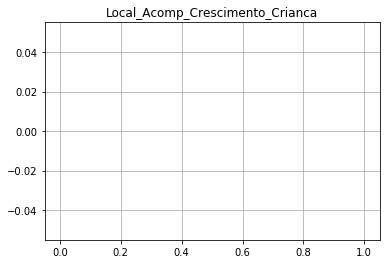

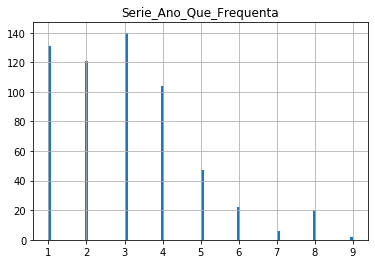

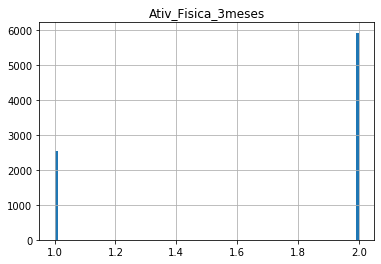

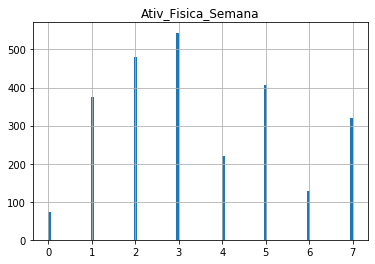

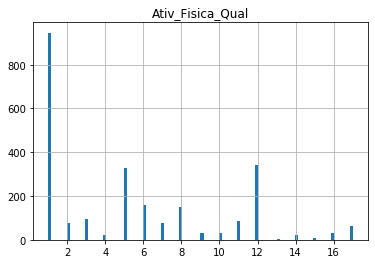

In [28]:
for col in list(df_sample):
    df_dataset.hist(column=col, bins=100)

## Análise dos atributos numéricos

- Utilizaremos uma amostra de 1000 instâncias selecionadas aleatoriamente (exceto para os outliers)

### Intervalo de Confiança

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [38]:
z = 2.054 # 96%
s = df_sample['Idade'].std()
m = df_sample['Idade'].mean()
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

44.6253761516173 < 45.689 < 46.7526238483827


In [39]:
z = 2.054 # 96%
s = df_sample['Parou_Menstruar'].std()
m = df_sample['Parou_Menstruar'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

44.33591807218617 < 45.09139784946237 < 45.84687762673857


In [40]:
z = 2.054 # 96%
s = df_sample['Uso_Quantos_Dias_Remedio_Dormir'].std()
m = df_sample['Uso_Quantos_Dias_Remedio_Dormir'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

10.314123603196363 < 10.628318584070797 < 10.942513564945232


In [41]:
z = 2.054 # 96%
s = df_sample['Idade_Gravidez'].std()
m = df_sample['Idade_Gravidez'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

20.17574050571561 < 20.50836120401338 < 20.84098190231115


### Poder Discriminativo de variáveis

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [42]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Idade'].std()
m1 = df_dep['Idade'].mean()
n1 = df_dep['Idade'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Idade'].std()
m2 = df_ndep['Idade'].mean()
n2 = df_ndep['Idade'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = (m1 - m2)/t

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 5.31420166350459 > 0.5 ?


In [43]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Parou_Menstruar'].std()
m1 = df_dep['Parou_Menstruar'].mean()
n1 = df_dep['Parou_Menstruar'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Parou_Menstruar'].std()
m2 = df_ndep['Parou_Menstruar'].mean()
n2 = df_ndep['Parou_Menstruar'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 1.5112114936862016 > 0.5 ?


In [44]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].std()
m1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].std()
m2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 2.6887662755868305 > 0.5 ?


In [45]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Idade_Gravidez'].std()
m1 = df_dep['Idade_Gravidez'].mean()
n1 = df_dep['Idade_Gravidez'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Idade_Gravidez'].std()
m2 = df_ndep['Idade_Gravidez'].mean()
n2 = df_ndep['Idade_Gravidez'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 0.3079822919473055 > 0.5 ?


### Outliers

In [47]:
df_outliers = df_dataset[['Idade', 'Parou_Menstruar', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez']]
limiar = 3 * df_outliers.std()
mean = df_outliers.mean()
outliers = (df_outliers < mean - limiar) | (df_outliers > mean + limiar)
outliers.describe()

,Idade,Parou_Menstruar,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez
count,8470,8470,8470,8470
unique,2,2,1,2
top,False,False,False,False
freq,8463,8410,8470,8428
